In [495]:
# test if we can import vit-prisma

import numpy as np
import torch
from vit_prisma.utils.constants import (
    DEVICE,
)
from vit_prisma.utils.tutorial_utils import (
    get_feature_activations,
    plot_act_distribution,
    plot_image,
)


In [496]:
import sys
from pathlib import Path

try:
    _project_root = Path(__file__).resolve().parents[1]
except NameError:
    _project_root = Path.cwd().parent

if str(_project_root) not in sys.path:
    sys.path.append(str(_project_root))


In [497]:
log_dir = '/nfs/turbo/coe-chaijy/janeding/regrounding/results_log'


In [498]:
import gc

# clear cache
torch.cuda.empty_cache()
# force garbage collection
gc.collect()

torch.cuda.set_device(0)
DEVICE = torch.device('cuda:0')


# Step 1: Load Transcoder and CLIP

In [499]:
# Load all transcoders
from src.analysis.utils import *

tc_list = load_all_tc()


2025-08-15 17:27:03 DEBUG:urllib3.connectionpool: https://huggingface.co:443 "HEAD /Prisma-Multimodal/CLIP-transcoder-topk-768-x64-all_patches_0-mlp-96/resolve/main/weights.pt HTTP/1.1" 302 0
2025-08-15 17:27:03 DEBUG:urllib3.connectionpool: https://huggingface.co:443 "HEAD /Prisma-Multimodal/CLIP-transcoder-topk-768-x64-all_patches_0-mlp-96/resolve/main/config.json HTTP/1.1" 307 0
2025-08-15 17:27:03 DEBUG:urllib3.connectionpool: https://huggingface.co:443 "HEAD /api/resolve-cache/models/Prisma-Multimodal/CLIP-transcoder-topk-768-x64-all_patches_0-mlp-96/b9ff9647261516e5c7a882f7fd130db702c8ea25/config.json HTTP/1.1" 200 0
2025-08-15 17:27:03 INFO:root: get_activation_fn received: activation_fn=topk, kwargs={'k': 768}
2025-08-15 17:27:03 DEBUG:urllib3.connectionpool: https://huggingface.co:443 "HEAD /Prisma-Multimodal/CLIP-transcoder-topk-256-x64-all_patches_1-mlp-94/resolve/main/weights.pt HTTP/1.1" 302 0


Loading SAE from /nfs/turbo/coe-chaijy-unreplicated/pre-trained-weights/prisma-sae/models--Prisma-Multimodal--CLIP-transcoder-topk-768-x64-all_patches_0-mlp-96/snapshots/b9ff9647261516e5c7a882f7fd130db702c8ea25/weights.pt...


2025-08-15 17:27:03 DEBUG:urllib3.connectionpool: https://huggingface.co:443 "HEAD /Prisma-Multimodal/CLIP-transcoder-topk-256-x64-all_patches_1-mlp-94/resolve/main/config.json HTTP/1.1" 307 0
2025-08-15 17:27:03 DEBUG:urllib3.connectionpool: https://huggingface.co:443 "HEAD /api/resolve-cache/models/Prisma-Multimodal/CLIP-transcoder-topk-256-x64-all_patches_1-mlp-94/96c293a7299a99fe3d70f1f15498215849f22d96/config.json HTTP/1.1" 200 0
2025-08-15 17:27:03 INFO:root: get_activation_fn received: activation_fn=topk, kwargs={'k': 256}


Loading SAE from /nfs/turbo/coe-chaijy-unreplicated/pre-trained-weights/prisma-sae/models--Prisma-Multimodal--CLIP-transcoder-topk-256-x64-all_patches_1-mlp-94/snapshots/96c293a7299a99fe3d70f1f15498215849f22d96/weights.pt...


2025-08-15 17:27:03 DEBUG:urllib3.connectionpool: https://huggingface.co:443 "HEAD /Prisma-Multimodal/CLIP-transcoder-topk-1024-x64-all_patches_2-mlp-93/resolve/main/weights.pt HTTP/1.1" 302 0
2025-08-15 17:27:03 DEBUG:urllib3.connectionpool: https://huggingface.co:443 "HEAD /Prisma-Multimodal/CLIP-transcoder-topk-1024-x64-all_patches_2-mlp-93/resolve/main/config.json HTTP/1.1" 307 0
2025-08-15 17:27:03 DEBUG:urllib3.connectionpool: https://huggingface.co:443 "HEAD /api/resolve-cache/models/Prisma-Multimodal/CLIP-transcoder-topk-1024-x64-all_patches_2-mlp-93/cfb7ad837b972edfa27c9719de0e9571893dc434/config.json HTTP/1.1" 200 0
2025-08-15 17:27:03 INFO:root: get_activation_fn received: activation_fn=topk, kwargs={'k': 1024}


Loading SAE from /nfs/turbo/coe-chaijy-unreplicated/pre-trained-weights/prisma-sae/models--Prisma-Multimodal--CLIP-transcoder-topk-1024-x64-all_patches_2-mlp-93/snapshots/cfb7ad837b972edfa27c9719de0e9571893dc434/weights.pt...


2025-08-15 17:27:03 DEBUG:urllib3.connectionpool: https://huggingface.co:443 "HEAD /Prisma-Multimodal/CLIP-transcoder-topk-1024-x64-all_patches_3-mlp-90/resolve/main/weights.pt HTTP/1.1" 302 0
2025-08-15 17:27:04 DEBUG:urllib3.connectionpool: https://huggingface.co:443 "HEAD /Prisma-Multimodal/CLIP-transcoder-topk-1024-x64-all_patches_3-mlp-90/resolve/main/config.json HTTP/1.1" 307 0
2025-08-15 17:27:04 DEBUG:urllib3.connectionpool: https://huggingface.co:443 "HEAD /api/resolve-cache/models/Prisma-Multimodal/CLIP-transcoder-topk-1024-x64-all_patches_3-mlp-90/3a169de44e8fa1641a9768aa84f3f99a9edd9828/config.json HTTP/1.1" 200 0
2025-08-15 17:27:04 INFO:root: get_activation_fn received: activation_fn=topk, kwargs={'k': 1024}


Loading SAE from /nfs/turbo/coe-chaijy-unreplicated/pre-trained-weights/prisma-sae/models--Prisma-Multimodal--CLIP-transcoder-topk-1024-x64-all_patches_3-mlp-90/snapshots/3a169de44e8fa1641a9768aa84f3f99a9edd9828/weights.pt...


2025-08-15 17:27:04 DEBUG:urllib3.connectionpool: https://huggingface.co:443 "HEAD /Prisma-Multimodal/CLIP-transcoder-topk-512-x64-all_patches_4-mlp-76/resolve/main/weights.pt HTTP/1.1" 302 0
2025-08-15 17:27:04 DEBUG:urllib3.connectionpool: https://huggingface.co:443 "HEAD /Prisma-Multimodal/CLIP-transcoder-topk-512-x64-all_patches_4-mlp-76/resolve/main/config.json HTTP/1.1" 307 0
2025-08-15 17:27:04 DEBUG:urllib3.connectionpool: https://huggingface.co:443 "HEAD /api/resolve-cache/models/Prisma-Multimodal/CLIP-transcoder-topk-512-x64-all_patches_4-mlp-76/01926c5c792d963b51953bb5922674a484c215a5/config.json HTTP/1.1" 200 0
2025-08-15 17:27:04 INFO:root: get_activation_fn received: activation_fn=topk, kwargs={'k': 512}


Loading SAE from /nfs/turbo/coe-chaijy-unreplicated/pre-trained-weights/prisma-sae/models--Prisma-Multimodal--CLIP-transcoder-topk-512-x64-all_patches_4-mlp-76/snapshots/01926c5c792d963b51953bb5922674a484c215a5/weights.pt...


2025-08-15 17:27:04 DEBUG:urllib3.connectionpool: https://huggingface.co:443 "HEAD /Prisma-Multimodal/CLIP-transcoder-topk-1024-x64-all_patches_5-mlp-91/resolve/main/weights.pt HTTP/1.1" 302 0
2025-08-15 17:27:04 DEBUG:urllib3.connectionpool: https://huggingface.co:443 "HEAD /Prisma-Multimodal/CLIP-transcoder-topk-1024-x64-all_patches_5-mlp-91/resolve/main/config.json HTTP/1.1" 307 0
2025-08-15 17:27:04 DEBUG:urllib3.connectionpool: https://huggingface.co:443 "HEAD /api/resolve-cache/models/Prisma-Multimodal/CLIP-transcoder-topk-1024-x64-all_patches_5-mlp-91/12ebdd11e4e404bb95bbcab991eee795fb8cf66c/config.json HTTP/1.1" 200 0
2025-08-15 17:27:04 INFO:root: get_activation_fn received: activation_fn=topk, kwargs={'k': 1024}


Loading SAE from /nfs/turbo/coe-chaijy-unreplicated/pre-trained-weights/prisma-sae/models--Prisma-Multimodal--CLIP-transcoder-topk-1024-x64-all_patches_5-mlp-91/snapshots/12ebdd11e4e404bb95bbcab991eee795fb8cf66c/weights.pt...


2025-08-15 17:27:04 DEBUG:urllib3.connectionpool: https://huggingface.co:443 "HEAD /Prisma-Multimodal/CLIP-transcoder-topk-1024-x64-all_patches_6-mlp-94/resolve/main/weights.pt HTTP/1.1" 302 0
2025-08-15 17:27:05 DEBUG:urllib3.connectionpool: https://huggingface.co:443 "HEAD /Prisma-Multimodal/CLIP-transcoder-topk-1024-x64-all_patches_6-mlp-94/resolve/main/config.json HTTP/1.1" 307 0
2025-08-15 17:27:05 DEBUG:urllib3.connectionpool: https://huggingface.co:443 "HEAD /api/resolve-cache/models/Prisma-Multimodal/CLIP-transcoder-topk-1024-x64-all_patches_6-mlp-94/d0d722d64076e3911bff4b56d92a370543f1ca15/config.json HTTP/1.1" 200 0
2025-08-15 17:27:05 INFO:root: get_activation_fn received: activation_fn=topk, kwargs={'k': 1024}


Loading SAE from /nfs/turbo/coe-chaijy-unreplicated/pre-trained-weights/prisma-sae/models--Prisma-Multimodal--CLIP-transcoder-topk-1024-x64-all_patches_6-mlp-94/snapshots/d0d722d64076e3911bff4b56d92a370543f1ca15/weights.pt...


2025-08-15 17:27:05 DEBUG:urllib3.connectionpool: https://huggingface.co:443 "HEAD /Prisma-Multimodal/CLIP-transcoder-topk-1024-x64-all_patches_7-mlp-97/resolve/main/weights.pt HTTP/1.1" 302 0
2025-08-15 17:27:05 DEBUG:urllib3.connectionpool: https://huggingface.co:443 "HEAD /Prisma-Multimodal/CLIP-transcoder-topk-1024-x64-all_patches_7-mlp-97/resolve/main/config.json HTTP/1.1" 307 0
2025-08-15 17:27:05 DEBUG:urllib3.connectionpool: https://huggingface.co:443 "HEAD /api/resolve-cache/models/Prisma-Multimodal/CLIP-transcoder-topk-1024-x64-all_patches_7-mlp-97/010d526da64705bae8b61f1c6b66617a2ecb69f8/config.json HTTP/1.1" 200 0
2025-08-15 17:27:05 INFO:root: get_activation_fn received: activation_fn=topk, kwargs={'k': 1024}


Loading SAE from /nfs/turbo/coe-chaijy-unreplicated/pre-trained-weights/prisma-sae/models--Prisma-Multimodal--CLIP-transcoder-topk-1024-x64-all_patches_7-mlp-97/snapshots/010d526da64705bae8b61f1c6b66617a2ecb69f8/weights.pt...


2025-08-15 17:27:05 DEBUG:urllib3.connectionpool: https://huggingface.co:443 "HEAD /Prisma-Multimodal/CLIP-transcoder-topk-1024-x64-all_patches_8-mlp-98/resolve/main/weights.pt HTTP/1.1" 302 0
2025-08-15 17:27:05 DEBUG:urllib3.connectionpool: https://huggingface.co:443 "HEAD /Prisma-Multimodal/CLIP-transcoder-topk-1024-x64-all_patches_8-mlp-98/resolve/main/config.json HTTP/1.1" 307 0
2025-08-15 17:27:05 DEBUG:urllib3.connectionpool: https://huggingface.co:443 "HEAD /api/resolve-cache/models/Prisma-Multimodal/CLIP-transcoder-topk-1024-x64-all_patches_8-mlp-98/43d0de77b2a27e664be61a74548d30a826db26fe/config.json HTTP/1.1" 200 0
2025-08-15 17:27:06 INFO:root: get_activation_fn received: activation_fn=topk, kwargs={'k': 1024}


Loading SAE from /nfs/turbo/coe-chaijy-unreplicated/pre-trained-weights/prisma-sae/models--Prisma-Multimodal--CLIP-transcoder-topk-1024-x64-all_patches_8-mlp-98/snapshots/43d0de77b2a27e664be61a74548d30a826db26fe/weights.pt...


2025-08-15 17:27:06 DEBUG:urllib3.connectionpool: https://huggingface.co:443 "HEAD /Prisma-Multimodal/CLIP-transcoder-topk-1024-x64-all_patches_9-mlp-98/resolve/main/weights.pt HTTP/1.1" 302 0
2025-08-15 17:27:06 DEBUG:urllib3.connectionpool: https://huggingface.co:443 "HEAD /Prisma-Multimodal/CLIP-transcoder-topk-1024-x64-all_patches_9-mlp-98/resolve/main/config.json HTTP/1.1" 307 0
2025-08-15 17:27:06 DEBUG:urllib3.connectionpool: https://huggingface.co:443 "HEAD /api/resolve-cache/models/Prisma-Multimodal/CLIP-transcoder-topk-1024-x64-all_patches_9-mlp-98/6f57a523ab849e1b5544b94572d539da7c30cbdb/config.json HTTP/1.1" 200 0
2025-08-15 17:27:06 INFO:root: get_activation_fn received: activation_fn=topk, kwargs={'k': 1024}


Loading SAE from /nfs/turbo/coe-chaijy-unreplicated/pre-trained-weights/prisma-sae/models--Prisma-Multimodal--CLIP-transcoder-topk-1024-x64-all_patches_9-mlp-98/snapshots/6f57a523ab849e1b5544b94572d539da7c30cbdb/weights.pt...


2025-08-15 17:27:06 DEBUG:urllib3.connectionpool: https://huggingface.co:443 "HEAD /Prisma-Multimodal/CLIP-transcoder-topk-1024-x64-all_patches_10-mlp-97/resolve/main/weights.pt HTTP/1.1" 302 0
2025-08-15 17:27:06 DEBUG:urllib3.connectionpool: https://huggingface.co:443 "HEAD /Prisma-Multimodal/CLIP-transcoder-topk-1024-x64-all_patches_10-mlp-97/resolve/main/config.json HTTP/1.1" 307 0
2025-08-15 17:27:06 DEBUG:urllib3.connectionpool: https://huggingface.co:443 "HEAD /api/resolve-cache/models/Prisma-Multimodal/CLIP-transcoder-topk-1024-x64-all_patches_10-mlp-97/a083216cc058dad1ea74a5b375c6c152b76ca6ad/config.json HTTP/1.1" 200 0
2025-08-15 17:27:06 INFO:root: get_activation_fn received: activation_fn=topk, kwargs={'k': 1024}


Loading SAE from /nfs/turbo/coe-chaijy-unreplicated/pre-trained-weights/prisma-sae/models--Prisma-Multimodal--CLIP-transcoder-topk-1024-x64-all_patches_10-mlp-97/snapshots/a083216cc058dad1ea74a5b375c6c152b76ca6ad/weights.pt...


In [500]:
# we will first start by the last transcoder
from pprint import pprint

tc_10 = tc_list[10]
pprint(tc_10.cfg)
tc_10.cfg.hook_point


VisionModelSAERunnerConfig(model_class_name='HookedViT',
                           model_name='open-clip:laion/CLIP-ViT-B-32-DataComp.XL-s13B-b90K',
                           vit_model_cfg=None,
                           model_path=None,
                           hook_point_layer=10,
                           layer_subtype='ln2.hook_normalized',
                           hook_point_head_index=None,
                           context_size=50,
                           use_cached_activations=False,
                           use_patches_only=False,
                           cached_activations_path='activations/_network_scratch_s_sonia.joseph_datasets_kaggle_datasets/open-clip:laion_CLIP-ViT-B-32-DataComp.XL-s13B-b90K/blocks.9.ln2.hook_normalized',
                           image_size=224,
                           architecture='standard',
                           b_dec_init_method='geometric_median',
                           expansion_factor=64,
                           f

'blocks.10.ln2.hook_normalized'

In [501]:
# DEVICE = 'cuda:0'


# load text model
def name_from_hf(model_name):
    """return model name from huggingface"""
    return model_name.replace('open-clip:', 'hf-hub:')


import open_clip

# model_name = name_from_hf(tc_10.cfg.model_name)
# print(model_name)
model_name = 'hf-hub:laion/CLIP-ViT-B-32-DataComp.XL-s13B-b90K'
model, preprocess_train, preprocess_val = open_clip.create_model_and_transforms(
    model_name
)
model.to(DEVICE)
model.eval()

tokenizer = open_clip.get_tokenizer(model_name)
print(tokenizer)

print(preprocess_val)


2025-08-15 17:27:06 DEBUG:urllib3.connectionpool: https://huggingface.co:443 "HEAD /laion/CLIP-ViT-B-32-DataComp.XL-s13B-b90K/resolve/main/open_clip_model.safetensors HTTP/1.1" 302 0
2025-08-15 17:27:07 DEBUG:urllib3.connectionpool: https://huggingface.co:443 "HEAD /laion/CLIP-ViT-B-32-DataComp.XL-s13B-b90K/resolve/main/open_clip_config.json HTTP/1.1" 307 0
2025-08-15 17:27:07 DEBUG:urllib3.connectionpool: https://huggingface.co:443 "HEAD /api/resolve-cache/models/laion/CLIP-ViT-B-32-DataComp.XL-s13B-b90K/f0e2ffa09cbadab3db6a261ec1ec56407ce42912/open_clip_config.json HTTP/1.1" 200 0
2025-08-15 17:27:07 INFO:root: Loaded hf-hub:laion/CLIP-ViT-B-32-DataComp.XL-s13B-b90K model config.


2025-08-15 17:27:07 INFO:root: Loading pretrained hf-hub:laion/CLIP-ViT-B-32-DataComp.XL-s13B-b90K weights (/home/janeding/.cache/huggingface/hub/models--laion--CLIP-ViT-B-32-DataComp.XL-s13B-b90K/snapshots/f0e2ffa09cbadab3db6a261ec1ec56407ce42912/open_clip_model.safetensors).
2025-08-15 17:27:08 DEBUG:urllib3.connectionpool: https://huggingface.co:443 "HEAD /laion/CLIP-ViT-B-32-DataComp.XL-s13B-b90K/resolve/main/open_clip_config.json HTTP/1.1" 307 0
2025-08-15 17:27:08 DEBUG:urllib3.connectionpool: https://huggingface.co:443 "HEAD /api/resolve-cache/models/laion/CLIP-ViT-B-32-DataComp.XL-s13B-b90K/f0e2ffa09cbadab3db6a261ec1ec56407ce42912/open_clip_config.json HTTP/1.1" 200 0


Compose(
    Resize(size=224, interpolation=bicubic, max_size=None, antialias=True)
    CenterCrop(size=(224, 224))
    <function _convert_to_rgb at 0x7f616b6ab420>
    ToTensor()
    Normalize(mean=[0.48145466, 0.4578275, 0.40821073], std=[0.26862954, 0.26130258, 0.27577711])
)


In [502]:
# load vision model
from vit_prisma.models.model_loader import load_hooked_model
from vit_prisma.utils.enums import ModelType

model_name = tc_10.cfg.model_name
print(model_name)

model_v = load_hooked_model(model_name, model_type=ModelType.VISION)
model_v.to(DEVICE)


2025-08-15 17:27:08 INFO:root: Model 'open-clip:laion/CLIP-ViT-B-32-DataComp.XL-s13B-b90K' is supported and passes tests.
2025-08-15 17:27:08 INFO:root: model_id download_pretrained_from_hf: laion/CLIP-ViT-B-32-DataComp.XL-s13B-b90K
2025-08-15 17:27:08 DEBUG:urllib3.connectionpool: https://huggingface.co:443 "HEAD /laion/CLIP-ViT-B-32-DataComp.XL-s13B-b90K/resolve/main/open_clip_config.json HTTP/1.1" 307 0
2025-08-15 17:27:08 DEBUG:urllib3.connectionpool: https://huggingface.co:443 "HEAD /api/resolve-cache/models/laion/CLIP-ViT-B-32-DataComp.XL-s13B-b90K/f0e2ffa09cbadab3db6a261ec1ec56407ce42912/open_clip_config.json HTTP/1.1" 200 0
2025-08-15 17:27:08 INFO:root: HookedViTConfig(n_layers=12, d_model=768, d_head=64, d_mlp=3072, model_name='open-clip:laion/CLIP-ViT-B-32-DataComp.XL-s13B-b90K', use_cls_token=True, n_heads=12, activation_name='gelu', d_vocab=-1, eps=1e-05, use_attn_result=False, use_attn_scale=True, use_split_qkv_input=False, use_hook_mlp_in=False, use_attn_in=False, use_lo

open-clip:laion/CLIP-ViT-B-32-DataComp.XL-s13B-b90K


2025-08-15 17:27:08 INFO:root: model_id download_pretrained_from_hf: laion/CLIP-ViT-B-32-DataComp.XL-s13B-b90K
2025-08-15 17:27:08 DEBUG:urllib3.connectionpool: https://huggingface.co:443 "HEAD /laion/CLIP-ViT-B-32-DataComp.XL-s13B-b90K/resolve/main/open_clip_pytorch_model.bin HTTP/1.1" 302 0
2025-08-15 17:27:09 INFO:root: visual projection shape: torch.Size([768, 512])
2025-08-15 17:27:09 INFO:root: Loaded pretrained model open-clip:laion/CLIP-ViT-B-32-DataComp.XL-s13B-b90K into HookedTransformer


HookedViT(
  (embed): PatchEmbedding(
    (proj): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32))
  )
  (hook_embed): HookPoint()
  (pos_embed): PosEmbedding()
  (hook_pos_embed): HookPoint()
  (hook_full_embed): HookPoint()
  (ln_pre): LayerNorm(
    (hook_scale): HookPoint()
    (hook_normalized): HookPoint()
  )
  (hook_ln_pre): HookPoint()
  (blocks): ModuleList(
    (0-11): 12 x TransformerBlock(
      (ln1): LayerNorm(
        (hook_scale): HookPoint()
        (hook_normalized): HookPoint()
      )
      (ln2): LayerNorm(
        (hook_scale): HookPoint()
        (hook_normalized): HookPoint()
      )
      (attn): Attention(
        (hook_k): HookPoint()
        (hook_q): HookPoint()
        (hook_v): HookPoint()
        (hook_z): HookPoint()
        (hook_attn_scores): HookPoint()
        (hook_pattern): HookPoint()
        (hook_result): HookPoint()
      )
      (mlp): MLP(
        (hook_pre): HookPoint()
        (hook_post): HookPoint()
      )
      (hook_attn_in): Ho

# Step 2: Load image and labels

2025-08-15 17:27:09 DEBUG:PIL.PngImagePlugin: STREAM b'IHDR' 16 13
2025-08-15 17:27:09 DEBUG:PIL.PngImagePlugin: STREAM b'pHYs' 41 9
2025-08-15 17:27:09 DEBUG:PIL.PngImagePlugin: STREAM b'tEXt' 62 25
2025-08-15 17:27:09 DEBUG:PIL.PngImagePlugin: STREAM b'IDAT' 99 8192
2025-08-15 17:27:09 WARNING:matplotlib.image: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7922626..2.145897].


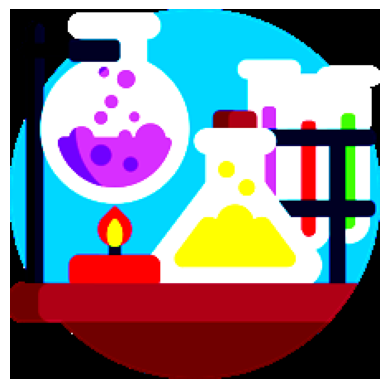

In [503]:
# load image
from PIL import Image
from vit_prisma.transforms import get_clip_val_transforms

# img_path = '/nfs/turbo/coe-chaijy/janeding/example_images/smiling-face.png'
img_path = (
    '/nfs/turbo/coe-chaijy/janeding/regrounding/example_images/chemistry-4.png'
)
gt_label = 'chemistry'
img = Image.open(img_path).convert()  # Ensure it's 3 channels
transforms = get_clip_val_transforms()
img_tensor = transforms(img)
plot_image(img_tensor.detach().cpu(), unstandardise=False)


In [504]:
import pandas as pd

file_path = '/nfs/turbo/coe-chaijy/janeding/regrounding/MyTC_bert/data/concrete_visual_vocabulary.csv'
labels = pd.read_csv(file_path)

labels = labels.dropna(subset=['word'])
labels['word'] = labels['word'].astype(str).str.lower().str.strip()
labels = labels[labels['word'].ne('')]
labels = labels[labels['word'].ne('nan')]

# turn into dict
label_dict = {
    row['word']: {
        'concreteness': row['concreteness'],
        'imageability': row['imageability'],
    }
    for _, row in labels.iterrows()
}

In [505]:
# clear cache
torch.cuda.empty_cache()
# force garbage collection
gc.collect()


1353

In [506]:
label_dict

{'kite': {'concreteness': 5.0, 'imageability': 4.1875},
 'wine bottle': {'concreteness': 5.0, 'imageability': 4.3125},
 'wedding gown': {'concreteness': 5.0, 'imageability': 4.5},
 'pig': {'concreteness': 5.0, 'imageability': 3.75},
 'porcupine': {'concreteness': 5.0, 'imageability': 4.117647059},
 'flashlight': {'concreteness': 5.0, 'imageability': 4.590909091},
 'popcorn': {'concreteness': 5.0, 'imageability': 3.8125},
 'french horn': {'concreteness': 5.0, 'imageability': 3.666666667},
 'banana': {'concreteness': 5.0, 'imageability': 3.894736842},
 'cream cheese': {'concreteness': 5.0, 'imageability': 2.8125},
 'sea turtle': {'concreteness': 5.0, 'imageability': 4.294117647},
 'eye drops': {'concreteness': 5.0, 'imageability': 4.421052632},
 'golden retriever': {'concreteness': 5.0, 'imageability': 4.470588235},
 'sand': {'concreteness': 5.0, 'imageability': 3.578947368},
 'sardine': {'concreteness': 5.0, 'imageability': 3.777777778},
 'mule': {'concreteness': 5.0, 'imageability': 3.

In [507]:
CHUNK_SIZE = 512

labels = list(label_dict.keys())
prompts = [f'a photo of a {l}' for l in labels]
text_tokens = open_clip.tokenize(prompts)  # [N, 77] on CPU

with torch.no_grad():
    image_input = img_tensor.unsqueeze(0).to(DEVICE)
    image_features = model.encode_image(image_input)
    image_features /= image_features.norm(dim=-1, keepdim=True)

    text_feats_out = []
    for i in range(0, len(text_tokens), CHUNK_SIZE):
        chunk = text_tokens[i : i + CHUNK_SIZE].to(DEVICE, non_blocking=True)
        feats = model.encode_text(chunk)
        feats = feats / feats.norm(dim=-1, keepdim=True)
        text_feats_out.append(feats.cpu())
    text_features = torch.cat(text_feats_out).to(DEVICE)

    text_probs = (100.0 * image_features @ text_features.T).softmax(dim=-1)
    top_probs, top_idx = text_probs.squeeze().topk(10)

for i, (prob, idx) in enumerate(zip(top_probs, top_idx)):
    print(f'{i + 1}. label: {labels[idx]:<20} | prob: {prob.item():.4f}')


1. label: alchemy              | prob: 0.5253
2. label: alchemist            | prob: 0.0740
3. label: chemistry            | prob: 0.0516
4. label: science              | prob: 0.0458
5. label: potion               | prob: 0.0156
6. label: experimentalist      | prob: 0.0071
7. label: experimented         | prob: 0.0066
8. label: laboriously          | prob: 0.0060
9. label: experimentally       | prob: 0.0060
10. label: scientific           | prob: 0.0059


# Step 3: Find $f_{end}$
We will calculate the cos similarity for the label "chemistry"'s text embedding and the transcoder decoder matrix of the last layer, to get the most related feature, also our destination $f_{end}$.

In [508]:
# get text embedding
# gt_label = 'chemistry'
# gt_label = 'smile'
text_input = tokenizer([gt_label]).to(DEVICE)
with torch.no_grad():
    text_embedding = model.encode_text(text_input)
    text_embedding = text_embedding / text_embedding.norm(dim=-1, keepdim=True)

text_embedding.shape


torch.Size([1, 512])

In [509]:
decoder_vectors = tc_10.W_dec.T
decoder_vectors = decoder_vectors / decoder_vectors.norm(dim=-1, keepdim=True)
decoder_vectors.shape


torch.Size([768, 49152])

In [510]:
projected_decoder_vectors = model.visual.proj.T @ decoder_vectors
projected_decoder_vectors.shape


torch.Size([512, 49152])

In [511]:
similarities = text_embedding @ projected_decoder_vectors
similarities


tensor([[-0.0018, -0.0004, -0.0004,  ...,  0.0013,  0.0012,  0.0006]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [512]:
top_k_similarities, top_k_indices = torch.topk(similarities.squeeze(), k=1)
f_end_index = top_k_indices[0].item()
f_end_similarity = top_k_similarities[0].item()

print(
    f'in MLP layer, the most related visual feature (f_end) index is: {f_end_index}'
)
print(f'cosine similarity in shared space is: {f_end_similarity:.4f}')

feature_idx = f_end_index


in MLP layer, the most related visual feature (f_end) index is: 46014
cosine similarity in shared space is: 0.0096


# Step 4: Circuit analysis

In [513]:
def run_with_cache(model_input, model):
    """Run the batch through the model to get activations"""
    _, cache = model.run_with_cache(model_input)
    return cache


def get_feature_activations(tc, cache):
    """Compute the activation given a cache. If cache is not provided, run the model with cache.
    we only need the activations of the hook point, so here use .encode() to get the activations instead of a forward pass.
    """
    # _, cache = model.run_with_cache(model_input, names_filter=tc.cfg.hook_point)
    hook_point_activation = cache[tc.cfg.hook_point].to(DEVICE)

    # Calculate the transcoder features for the batch
    _, feature_acts, *_ = tc.encode(hook_point_activation)

    return feature_acts


In [514]:
cache = run_with_cache(img_tensor.to(DEVICE).unsqueeze(0), model_v)

feature_activations = get_feature_activations(tc_10, cache)
print(feature_activations.shape)
# the shape is (sample_num, context_size, feature_num)
feature_activations = feature_activations[0, 0, :]
print(feature_activations.shape)


torch.Size([1, 50, 49152])
torch.Size([49152])


In [515]:
top_indices, _ = plot_act_distribution(feature_activations, n_top=10)


Top 10 feature indices: [26500, 1779, 36970, 45947, 3243, 23650, 25734, 5010, 27101, 46014]
Top 10 feature values: [1.5956613 1.6386693 1.6690698 1.7187319 1.7291942 1.7576982 1.764606
 1.850695  2.319362  3.4851563]


**Here, we are delighted to see that the most activated feature for the image is feature 46014, which is just the feature we find for the text embedding of label!**

Now let's begin our circuit analysis!

In [516]:
# borrow from transcoder_circuits/circuit_analysis.py:
# https://github.com/jacobdunefsky/transcoder_circuits.git

import copy
import enum
from dataclasses import dataclass, field
from typing import List, Optional

# define some classes


class ComponentType(enum.Enum):
    MLP = 'mlp'
    ATTN = 'attn'
    EMBED = 'embed'

    # error terms
    TC_ERROR = 'tc_error'  # error due to inaccurate transcoders
    PRUNE_ERROR = (
        'prune_error'  # error due to only looking at top paths in graph
    )
    BIAS_ERROR = 'bias_error'  # account for bias terms in transcoders


class FeatureType(enum.Enum):
    NONE = 'none'
    SAE = 'sae'
    TRANSCODER = 'tc'


class ContribType(enum.Enum):
    RAW = 'raw'
    ZERO_ABLATION = 'zero_ablation'


# Component: an individual component (e.g. an attn head or a transcoder feature)
@dataclass
class Component:
    layer: int
    component_type: ComponentType

    token: Optional[int] = None

    attn_head: Optional[int] = None

    feature_type: Optional[FeatureType] = None
    feature_idx: Optional[int] = None

    def __str__(self, show_token=True):
        retstr = ''
        feature_type_str = ''

        base_str = f'{self.component_type.value}{self.layer}'
        attn_str = (
            ''
            if self.component_type != ComponentType.ATTN
            else f'[{self.attn_head}]'
        )

        feature_str = ''
        if self.feature_type is not None and self.feature_idx is not None:
            feature_str = f'{self.feature_type.value}[{self.feature_idx}]'

        token_str = ''
        if self.token is not None and show_token:
            token_str = f'@{self.token}'

        retstr = ''.join([base_str, attn_str, feature_str, token_str])
        return retstr

    def __repr__(self):
        return f'<Component object {self!s}>'


In [517]:
# build a feature vector first
from dataclasses import dataclass
from typing import Optional

import torch


@dataclass
class FeatureVector:
    component_path: List[Component]
    vector: torch.Tensor
    layer: int
    sublayer: str
    token: Optional[int] = None
    contrib: Optional[float] = None
    contrib_type: Optional[ContribType] = None
    error: float = 0.0

    def __post_init__(self):
        if self.token is None and len(self.component_path) > 0:
            self.token = self.component_path[-1].token
        if self.layer is None and len(self.component_path) > 0:
            self.layer = self.component_path[-1].layer

    # note: str(FeatureVector) should return a string that uniquely identifies a feature direction (e.g. for use in a causal graph)
    # (this is distinct from a unique feature *vector*, by the way)
    def __str__(self, show_full=True, show_contrib=True, show_last_token=True):
        retstr = ''
        token_str = (
            ''
            if self.token is None or not show_last_token
            else f'@{self.token}'
        )
        if len(self.component_path) > 0:
            if show_full:
                retstr = ''.join(
                    x.__str__(show_token=False)
                    for x in self.component_path[:-1]
                )
            retstr = ''.join(
                [
                    retstr,
                    self.component_path[-1].__str__(show_token=False),
                    token_str,
                ]
            )
        else:
            retstr = f'*{self.sublayer}{self.layer}{token_str}'
        if show_contrib and self.contrib is not None:
            retstr = ''.join([retstr, f': {self.contrib:.2}'])
        return retstr

    def __repr__(self):
        contrib_type_str = (
            ''
            if self.contrib_type is None
            else f' contrib_type={self.contrib_type.value}'
        )
        return f'<FeatureVector object {self!s}, sublayer={self.sublayer}{contrib_type_str}>'


In [518]:
@torch.no_grad()
def make_transcoder_feature_vector(
    sae, feature_idx, use_encoder=True, token=0
) -> FeatureVector:
    """Build a feature vector for a given transcoder feature index.
    Args:
        sae: the transcoder model
        feature_idx: the index of the feature
        use_encoder: output encoder or decoder feature
        token: the token index. Since we are building for image input, we pay attentiont to the CLS token, so we set token to 0.
    Returns:
        a FeatureVector object
    """

    hook_point = (
        sae.cfg.hook_point
        if (use_encoder or not sae.cfg.is_transcoder)
        else sae.cfg.out_hook_point
    )
    layer = (
        sae.cfg.hook_point_layer
        if (use_encoder or not sae.cfg.is_transcoder)
        else sae.cfg.out_hook_point_layer
    )
    feature_type = (
        FeatureType.SAE if not sae.cfg.is_transcoder else FeatureType.TRANSCODER
    )
    vector = (
        sae.W_enc[:, feature_idx] if use_encoder else sae.W_dec[feature_idx]
    )
    vector = torch.clone(vector.detach())
    vector.requires_grad = False
    vector.requires_grad_(False)
    if 'resid_mid' in hook_point or (
        'normalized' in hook_point and 'ln2' in hook_point
    ):
        # currently, we treat ln2normalized as resid_mid
        # this is kinda ugly, but because we account for layernorm constants in later
        #  functions, this does work now
        sublayer = 'resid_mid'
        component_type = ComponentType.MLP
    elif 'resid_pre' in hook_point:
        sublayer = 'resid_pre'
        component_type = ComponentType.ATTN
    elif 'mlp_out' in hook_point:
        sublayer = 'mlp_out'
        component_type = ComponentType.MLP
    elif 'resid_post' in hook_point:
        sublayer = 'resid_post'
        component_type = ComponentType.ATTN

    my_feature = FeatureVector(
        component_path=[
            Component(
                layer=layer,
                component_type=component_type,
                token=token,
                feature_type=feature_type,
                feature_idx=feature_idx,
            )
        ],
        layer=layer,
        sublayer=sublayer,
        vector=vector,
    )

    return my_feature


In [519]:
feature_vector = make_transcoder_feature_vector(tc_10, feature_idx)
print(feature_vector)
feature_vector.vector.shape


mlp10tc[46014]@0


torch.Size([768])

In [520]:
model.visual.transformer.resblocks[0].attn.out_proj.weight.shape


torch.Size([768, 768])

## Build the paths
We will use the greedy path finding algorithm to see which features contribute most to the previous ones.

In [521]:
from transformer_lens.utils import get_act_name, to_numpy


@torch.no_grad()
def get_attn_head_contribs(model, cache, layer_idx, range_normal):
    """
    Calculate the contribution of each attention head from each source token to each destination token, adapted for OpenCLIP ViT.

    Args:
        model: the visual model (e.g., model_v)
        cache: the cache of all the layers
        layer_idx: the current layer to analyze
        range_normal: the target direction vector (from a higher-level feature_vector)

    Returns:
        a tensor of shape [batch, num_heads, dst_pos, src_pos], representing the contribution scores
    """
    # 1. from cache, get v_acts and pattern
    # v_acts.shape: [batch, seq_len, num_heads, d_head]
    v_acts = cache[get_act_name('v', layer_idx)]

    # pattern.shape: [batch, num_heads, dst_pos, src_pos]
    pattern = cache[get_act_name('pattern', layer_idx)]

    # 2. get W_O and reshape for head-wise multiplication
    attn_block = model.visual.transformer.resblocks[layer_idx].attn
    n_heads = attn_block.num_heads
    d_model = attn_block.embed_dim
    d_head = d_model // n_heads

    W_O = attn_block.out_proj.weight.reshape(
        n_heads,
        d_head,
        d_model,  # d_head_out  # d_model
    )

    # 3. calculate contribs
    # 'bshf,hfm,b hds,m->bhds'
    # b: batch, s: src_pos, h: head, f: d_head, m: d_model, d: dst_pos
    contribs = torch.einsum(
        'bshf,hfm,bhds,m->bhds', v_acts, W_O, pattern, range_normal
    )

    return contribs


In [522]:
@torch.no_grad()
def get_transcoder_ixg(
    transcoder,
    cache,
    range_normal,
    input_layer,
    input_token_idx,
    return_numpy=True,
    is_transcoder_post_ln=True,
    return_feature_activs=True,
):
    pulledback_feature = transcoder.W_dec @ range_normal
    if is_transcoder_post_ln:
        act_name = get_act_name('normalized', input_layer, 'ln2')
    else:
        act_name = get_act_name('resid_mid', input_layer)

    feature_activs = transcoder.encode(cache[act_name])[1][0, input_token_idx]
    pulledback_feature = pulledback_feature * feature_activs
    if return_numpy:
        pulledback_feature = to_numpy(pulledback_feature)
        feature_activs = to_numpy(feature_activs)

    if not return_feature_activs:
        return pulledback_feature
    else:
        return pulledback_feature, feature_activs


# # get the mean input-times-gradient vector over a dataset of tokens
# @torch.no_grad()
# def get_mean_ixg(model, tokens_arr, range_transcoder, range_feature_idx, transcoder, token_idxs=None, batch_size=64, do_sum_count=False):
#     act_name = transcoder.cfg.hook_point
#     layer = transcoder.cfg.hook_point_layer

#     range_normal = range_transcoder.W_enc[:, range_feature_idx]
#     pulledback_feature = transcoder.W_dec @ range_normal


#     if token_idxs is None:
#         tokens_gen = tqdm.tqdm(range(0, tokens_arr.shape[0], batch_size))
#     else:
#         tokens_gen = tqdm.tqdm(token_idxs)

#     if not do_sum_count:
#         mean_ixgs = []
#     else:
#         ixgs_sum = np.zeros(transcoder.W_enc.shape[1])
#         ixgs_count = np.zeros(transcoder.W_enc.shape[1])

#     for t in tokens_gen:
#         if token_idxs is not None:
#             example_idx, token_idx = t
#             with torch.no_grad():
#                 _, cache = model.run_with_cache(tokens_arr[example_idx, :token_idx+1], stop_at_layer=layer+1, names_filter=[
#                     act_name
#                 ])
#                 acts = cache[act_name]
#                 feature_activs = transcoder.encode(acts)[1][0, token_idx]
#                 cur_ixg = (pulledback_feature * feature_activs)[None]
#         else:
#             i = t
#             with torch.no_grad():
#                 _, cache = model.run_with_cache(tokens_arr[i:i+batch_size], stop_at_layer=layer+1, names_filter=[
#                     act_name
#                 ])
#                 acts = cache[act_name]
#                 feature_activs = transcoder.encode(acts)[1].reshape(-1, transcoder.W_enc.shape[1])

#                 cur_ixg = torch.einsum('i, ji -> ji', pulledback_feature, feature_activs)

#         if not do_sum_count:
#             mean_ixgs.append(np.mean(to_numpy(cur_ixg), axis=0))
#         else:
#             ixgs_sum += to_numpy(cur_ixg).sum(axis=0)
#             ixgs_count += np.abs(to_numpy(cur_ixg)>0).sum(axis=0)

#     if do_sum_count:
#         ixgs_count[ixgs_count == 0] = 1
#         return ixgs_sum/ixgs_count, ixgs_count/len(token_idxs)
#     else:
#         return np.mean(mean_ixgs, axis=0)


# approximate layernorms as constants when propagating feature vectors backward
# for theoretical motivation, see the LayerNorm section of
# 	https://www.neelnanda.io/mechanistic-interpretability/attribution-patching
@torch.no_grad()
def get_ln_constant(
    model, cache, vector, layer, token, is_ln2=False, recip=False
):
    x_act_name = (
        get_act_name('resid_mid', layer)
        if is_ln2
        else get_act_name('resid_pre', layer)
    )
    x = cache[x_act_name][0, token]

    y_act_name = get_act_name('normalized', layer, 'ln2' if is_ln2 else 'ln1')
    y = cache[y_act_name][0, token]

    if torch.dot(vector, x) == 0:
        return torch.tensor(0.0)
    return (
        torch.dot(vector, y) / torch.dot(vector, x)
        if not recip
        else torch.dot(vector, x) / torch.dot(vector, y)
    )


In [523]:
@torch.no_grad()
def get_top_transcoder_features(
    model, transcoder, cache, feature_vector, layer, k=5
):
    my_token = (
        feature_vector.token
        if feature_vector.token >= 0
        else cache[get_act_name('resid_pre', 0)].shape[1] + feature_vector.token
    )
    is_transcoder_post_ln = (
        'ln2' in transcoder.cfg.hook_point
        and 'normalized' in transcoder.cfg.hook_point
    )

    # compute error
    if is_transcoder_post_ln:
        act_name = get_act_name('normalized', layer, 'ln2')
    else:
        act_name = get_act_name('resid_mid', layer)
    transcoder_out = transcoder.encode(cache[act_name])[0][0, my_token]
    # mlp_out = model.blocks[layer].mlp(cache[act_name])[0, my_token]
    mlp_out = model.visual.transformer.resblocks[layer].mlp(cache[act_name])[
        0, my_token
    ]

    error = torch.dot(
        feature_vector.vector, mlp_out - transcoder_out
    ) / torch.dot(feature_vector.vector, mlp_out)

    # compute pulledback feature
    pulledback_feature, feature_activs = get_transcoder_ixg(
        transcoder,
        cache,
        feature_vector.vector,
        layer,
        feature_vector.token,
        return_numpy=False,
        is_transcoder_post_ln=is_transcoder_post_ln,
    )
    top_contribs, top_indices = torch.topk(pulledback_feature, k=k)

    top_contribs_list = []
    for contrib, index in zip(top_contribs, top_indices):
        vector = transcoder.W_enc[:, index]
        vector = vector * (transcoder.W_dec @ feature_vector.vector)[index]

        if is_transcoder_post_ln:
            vector = vector * get_ln_constant(
                model, cache, vector, layer, feature_vector.token, is_ln2=True
            )

        new_component = Component(
            layer=layer,
            component_type=ComponentType.MLP,
            token=my_token,
            feature_type=FeatureType.TRANSCODER,
            feature_idx=index.item(),
        )
        top_contribs_list.append(
            FeatureVector(
                component_path=[new_component],
                vector=vector,
                layer=layer,
                sublayer='resid_mid',
                contrib=contrib.item(),
                contrib_type=ContribType.RAW,
                error=error,
            )
        )
    return top_contribs_list


In [524]:
@torch.no_grad()
def get_top_contribs(
    model,
    transcoders,
    cache,
    feature_vector,
    k=5,
    ignore_bos=False,
    only_return_all_scores=False,
    cap=None,
    filter=None,
):
    """
    Get top contributions for a feature vector.
    Adapted for a ViT model. It now uses get_attn_head_contribs for attention head calculations.
    Args:
        model: the CLIP model
        transcoders: the transcoders
        cache: the cache of all the layers
        feature_vector: the feature vector
        k: the number of top contributions to return
        ignore_bos: whether to ignore the BOS token
    """
    if feature_vector.sublayer == 'mlp_out':
        return get_top_transcoder_features(
            model,
            transcoders[feature_vector.layer],
            cache,
            feature_vector,
            feature_vector.layer,
            k=k,
        )

    my_layer = feature_vector.layer

    # get MLP contribs
    all_mlp_contribs = []
    # go to all the previous layers
    mlp_max_layer = my_layer + (
        1 if feature_vector.sublayer == 'resid_post' else 0
    )
    for cur_layer in range(mlp_max_layer):
        cur_top_features = get_top_transcoder_features(
            model, transcoders[cur_layer], cache, feature_vector, cur_layer, k=k
        )
        all_mlp_contribs = all_mlp_contribs + cur_top_features

    # get attn contribs
    all_attn_contribs = []
    attn_max_layer = my_layer + (
        1
        if feature_vector.sublayer == 'resid_post'
        or feature_vector.sublayer == 'resid_mid'
        else 0
    )
    for cur_layer in range(attn_max_layer):
        attn_contribs = get_attn_head_contribs(
            model, cache, cur_layer, feature_vector.vector
        )[0, :, feature_vector.token, :]
        # if ignore_bos:
        #     attn_contribs = attn_contribs[:, 1:]

        if attn_contribs.numel() == 0:
            print(f'No attn contribs for layer {cur_layer}')
            continue

        # here we get the top k attn contribs, they are scalars
        top_attn_contribs_flattened, top_attn_contrib_indices_flattened = (
            torch.topk(
                attn_contribs.flatten(), k=np.min([k, len(attn_contribs)])
            )
        )
        top_attn_contrib_indices = np.array(
            np.unravel_index(
                to_numpy(top_attn_contrib_indices_flattened),
                attn_contribs.shape,
            )
        ).T

        # here we get the top k attn contribs, they are vectors
        for contrib, (head, src_token) in zip(
            top_attn_contribs_flattened, top_attn_contrib_indices
        ):
            # adapted for ViT
            attn_block = model.visual.transformer.resblocks[cur_layer].attn
            d_model = attn_block.embed_dim
            n_heads = attn_block.num_heads
            d_head = d_model // n_heads
            # if ignore_bos:
            #     src_token = src_token + 1

            # W_O_head is used to project the feature vector to the head space
            # W_O_head.shape: (d_head, d_model) = (64, 768)
            W_O_head = attn_block.out_proj.weight.reshape(
                n_heads, d_head, d_model
            )[head, :, :]

            # in openclip, W_Q, W_K, W_V is in in_proj_weight, we need to use .chunk(3)[2] to separate them.
            # W_V_head.shape = (d_model, d_head) = (768, 64)
            W_V_head = (
                attn_block.in_proj_weight.chunk(3)[2]
                .reshape(d_model, n_heads, d_head)
                .permute(1, 0, 2)[head, :, :]
            )

            OV = W_V_head @ W_O_head  # shape: (d_model, d_model) = (768, 768)

            # vector = model.OV[cur_layer, head] @ feature_vector.vector
            vector = OV @ feature_vector.vector
            attn_pattern = cache[get_act_name('pattern', cur_layer)]
            vector = (
                vector * attn_pattern[0, head, feature_vector.token, src_token]
            )
            ln_constant = get_ln_constant(
                model, cache, vector, cur_layer, src_token, is_ln2=False
            )
            vector = vector * ln_constant
            if ln_constant.isnan():
                print('Nan!')

            new_component = Component(
                layer=cur_layer,
                component_type=ComponentType.ATTN,
                token=src_token,
                attn_head=head,
            )
            new_feature_vector = FeatureVector(
                component_path=feature_vector.component_path + [new_component],
                vector=vector,
                layer=cur_layer,
                sublayer='resid_pre',
                contrib=contrib.item(),
                contrib_type=ContribType.RAW,
            )
            all_attn_contribs.append(new_feature_vector)

    # get embedding contribs
    my_token = (
        feature_vector.token
        if feature_vector.token >= 0
        else cache[get_act_name('resid_pre', 0)].shape[1] + feature_vector.token
    )
    # my_token = feature_vector.token
    embedding_contrib = FeatureVector(
        component_path=feature_vector.component_path
        + [
            Component(
                layer=0,
                component_type=ComponentType.EMBED,
                token=my_token,
            )
        ],
        vector=feature_vector.vector,
        layer=0,
        sublayer='resid_pre',
        contrib=torch.dot(
            cache[get_act_name('resid_pre', 0)][0, feature_vector.token],
            feature_vector.vector,
        ).item(),
        contrib_type=ContribType.RAW,
    )

    # get top contribs from all categories
    all_contribs = all_mlp_contribs + all_attn_contribs + [embedding_contrib]

    if filter is not None:
        all_contribs = [x for x in all_contribs if filter.match(x)]

    if cap is not None:
        for i, contrib in enumerate(all_contribs):
            if contrib.contrib > cap:
                all_contribs[i].contrib = cap
                all_contribs[i].contrib_type = ContribType.ZERO_ABLATION
    all_contrib_scores = torch.tensor([x.contrib for x in all_contribs])
    if only_return_all_scores:
        return all_contrib_scores

    _, top_contrib_indices = torch.topk(
        all_contrib_scores, k=np.min([k, len(all_contrib_scores)])
    )
    return [all_contribs[i.item()] for i in top_contrib_indices]


In [525]:
@torch.no_grad()
def greedy_get_top_paths(
    model,
    transcoders,
    cache,
    feature_vector,
    num_iters=2,
    num_branches=5,
    ignore_bos=True,
    do_raw_attribution=False,
    filter=None,
):
    do_cap = not do_raw_attribution  # historical name change; TODO: refactor

    all_paths = []
    new_root = copy.deepcopy(feature_vector)

    # deal with LN constant
    # TODO: this is hacky and makes the assumption that if feature_vector is a transcoder feature, then it comes from the passed list of transcoders
    if new_root.component_path[-1].feature_type == FeatureType.TRANSCODER:
        tc = transcoders[new_root.layer]
        if 'ln2.hook_normalized' in tc.cfg.hook_point:
            ln_constant = get_ln_constant(
                model,
                cache,
                new_root.vector,
                new_root.layer,
                new_root.token,
                is_ln2=True,
            )
            new_root.vector *= ln_constant
        new_root.contrib = tc.encode(cache[tc.cfg.hook_point])[1][
            0, new_root.token, new_root.component_path[-1].feature_idx
        ].item()
    cur_paths = [[new_root]]
    for iter in range(num_iters):
        new_paths = []
        for path in cur_paths:
            cur_feature = path[-1]
            if cur_feature.layer == 0 and cur_feature.sublayer == 'resid_pre':
                continue

            cap = None
            if do_cap:
                # Cap feature contribs at smallest transcoder feature activation
                # This corresponds to calculating feature attribs by
                #   zero-ablating the output of the feature
                for cap_feature in path:
                    if len(cap_feature.component_path) > 0 and (
                        cap_feature.component_path[-1].feature_type
                        == FeatureType.TRANSCODER
                        or (
                            cap_feature.component_path[-1].feature_type
                            == FeatureType.SAE
                            and (cap is None or cap_feature.contrib < cap)
                        )
                    ):
                        cap = cap_feature.contrib

            cur_top_contribs = get_top_contribs(
                model,
                transcoders,
                cache,
                cur_feature,
                k=num_branches,
                ignore_bos=ignore_bos,
                cap=cap,
                filter=filter,
            )
            new_paths = new_paths + [
                path + [cur_top_contrib] for cur_top_contrib in cur_top_contribs
            ]
        _, top_new_path_indices = torch.topk(
            torch.tensor([new_path[-1].contrib for new_path in new_paths]),
            k=np.min([num_branches, len(new_paths)]),
        )
        cur_paths = [new_paths[i] for i in top_new_path_indices]
        all_paths.append(cur_paths)
    return all_paths


In [526]:
NUM_ITERS = 10


In [527]:
all_paths = greedy_get_top_paths(
    model,
    tc_list,
    cache,
    feature_vector,
    num_iters=NUM_ITERS,
    num_branches=15,
    do_raw_attribution=True,
)


In [528]:
def print_all_paths(paths):
    if len(paths) == 0:
        return
    if type(paths[0][0]) is list:
        for i, cur_paths in enumerate(paths):
            try:
                print(f'--- Paths of size {len(cur_paths[0])} ---')
            except:
                continue
            for j, cur_path in enumerate(cur_paths):
                print(f'Path [{i}][{j}]: ', end='')
                print(
                    ' <- '.join(
                        map(
                            lambda x: x.__str__(
                                show_full=False, show_last_token=True
                            ),
                            cur_path,
                        )
                    )
                )
    else:
        for j, cur_path in enumerate(paths):
            print(f'Path [{j}]: ', end='')
            print(
                ' <- '.join(
                    map(
                        lambda x: x.__str__(
                            show_full=False, show_last_token=True
                        ),
                        cur_path,
                    )
                )
            )


In [529]:
print_all_paths(all_paths)


--- Paths of size 2 ---
Path [0][0]: mlp10tc[46014]@0: 3.5 <- mlp9tc[3300]@0: 2.5
Path [0][1]: mlp10tc[46014]@0: 3.5 <- mlp9tc[37227]@0: 2.4
Path [0][2]: mlp10tc[46014]@0: 3.5 <- mlp8tc[10728]@0: 2.3
Path [0][3]: mlp10tc[46014]@0: 3.5 <- mlp8tc[21658]@0: 2.0
Path [0][4]: mlp10tc[46014]@0: 3.5 <- mlp9tc[188]@0: 1.9
Path [0][5]: mlp10tc[46014]@0: 3.5 <- mlp8tc[7053]@0: 1.9
Path [0][6]: mlp10tc[46014]@0: 3.5 <- mlp9tc[1987]@0: 1.8
Path [0][7]: mlp10tc[46014]@0: 3.5 <- mlp8tc[13869]@0: 1.8
Path [0][8]: mlp10tc[46014]@0: 3.5 <- mlp9tc[42258]@0: 1.7
Path [0][9]: mlp10tc[46014]@0: 3.5 <- mlp8tc[29772]@0: 1.6
Path [0][10]: mlp10tc[46014]@0: 3.5 <- mlp9tc[39645]@0: 1.6
Path [0][11]: mlp10tc[46014]@0: 3.5 <- mlp9tc[43817]@0: 1.5
Path [0][12]: mlp10tc[46014]@0: 3.5 <- mlp9tc[25042]@0: 1.5
Path [0][13]: mlp10tc[46014]@0: 3.5 <- mlp9tc[35725]@0: 1.5
Path [0][14]: mlp10tc[46014]@0: 3.5 <- mlp8tc[10613]@0: 1.5
--- Paths of size 3 ---
Path [1][0]: mlp10tc[46014]@0: 3.5 <- mlp8tc[29772]@0: 1.6 <- embed

In [530]:
import dataclasses


class FilterType(enum.Enum):
    EQ = enum.auto()  # equals
    NE = enum.auto()  # not equal to
    GT = enum.auto()  # greater than
    GE = enum.auto()  # greater than or equal to
    LT = enum.auto()  # less than
    LE = enum.auto()  # less than or equal to


@dataclass
class FeatureFilter:
    # feature-level filters
    layer: Optional[int] = field(
        default=None, metadata={'filter_level': 'feature'}
    )
    layer_filter_type: FilterType = FilterType.EQ
    sublayer: Optional[int] = field(
        default=None, metadata={'filter_level': 'feature'}
    )
    sublayer_filter_type: FilterType = FilterType.EQ
    token: Optional[int] = field(
        default=None, metadata={'filter_level': 'feature'}
    )
    token_filter_type: FilterType = FilterType.EQ

    # filters on last component in component_path
    component_type: Optional[ComponentType] = field(
        default=None, metadata={'filter_level': 'component'}
    )
    component_type_filter_type: FilterType = FilterType.EQ
    attn_head: Optional[int] = field(
        default=None, metadata={'filter_level': 'component'}
    )
    attn_head_filter_type: FilterType = FilterType.EQ
    feature_type: Optional[FeatureType] = field(
        default=None, metadata={'filter_level': 'component'}
    )
    feature_type_filter_type: FilterType = FilterType.EQ
    feature_idx: Optional[int] = field(
        default=None, metadata={'filter_level': 'component'}
    )
    feature_idx_filter_type: FilterType = FilterType.EQ

    def match(self, feature):
        component = None

        for field in dataclasses.fields(self):
            name = field.name
            val = self.__dict__[name]
            if val is None:
                continue

            try:
                filter_level = field.metadata['filter_level']
            except KeyError:
                continue  # not a filter
            if filter_level == 'feature':
                if val is not None:
                    filter_type = self.__dict__[f'{name}_filter_type']
                    if (
                        filter_type == FilterType.EQ
                        and val != feature.__dict__[name]
                    ):
                        return False
                    if (
                        filter_type == FilterType.NE
                        and val == feature.__dict__[name]
                    ):
                        return False
                    if (
                        filter_type == FilterType.GT
                        and feature.__dict__[name] <= val
                    ):
                        return False
                    if (
                        filter_type == FilterType.GE
                        and feature.__dict__[name] < val
                    ):
                        return False
                    if (
                        filter_type == FilterType.LT
                        and feature.__dict__[name] >= val
                    ):
                        return False
                    if (
                        filter_type == FilterType.LE
                        and feature.__dict__[name] > val
                    ):
                        return False
            elif filter_level == 'component':
                if component is None:
                    if len(feature.component_path) <= 0:
                        return False
                    component = feature.component_path[-1]
                if val is not None:
                    filter_type = self.__dict__[f'{name}_filter_type']
                    if (
                        filter_type == FilterType.EQ
                        and val != component.__dict__[name]
                    ):
                        return False
                    if (
                        filter_type == FilterType.NE
                        and val == component.__dict__[name]
                    ):
                        return False
        return True


In [531]:
# filter paths

import functools


def flatten_nested_list(x):
    return list(functools.reduce(lambda a, b: a + b, x))


def get_paths_via_filter(
    all_paths, infix_path=None, not_infix_path=None, suffix_path=None
):
    retpaths = []
    if type(all_paths[0][0]) is list:
        path_list = flatten_nested_list(all_paths)
    else:
        path_list = all_paths
    for path in path_list:
        if not_infix_path is not None:
            if len(path) < len(not_infix_path):
                continue

            match_started = False
            path_good = True
            i = 0
            for j, cur_feature in enumerate(path):
                cur_infix_filter = not_infix_path[i]

                if cur_infix_filter.match(cur_feature):
                    if not match_started:
                        if len(path[j:]) < len(not_infix_path):
                            break
                        match_started = True
                elif match_started:
                    path_good = False
                    break

                if match_started:
                    i = i + 1
                    if i >= len(not_infix_path):
                        break
            if not (match_started and path_good):
                retpaths.append(path)

        if infix_path is not None:
            if len(path) < len(infix_path):
                continue

            match_started = False
            path_good = True
            i = 0
            for j, cur_feature in enumerate(path):
                cur_infix_filter = infix_path[i]

                if cur_infix_filter.match(cur_feature):
                    if not match_started:
                        if len(path[j:]) < len(infix_path):
                            break
                        match_started = True
                elif match_started:
                    path_good = False
                    break

                if match_started:
                    i = i + 1
                    if i >= len(infix_path):
                        break
            if match_started and path_good:
                retpaths.append(path)

        if suffix_path is not None:
            if len(path) < len(suffix_path):
                continue
            path_good = True
            for i in range(1, len(suffix_path) + 1):
                cur_feature = path[-i]
                cur_suffix_filter = suffix_path[-i]
                if not cur_suffix_filter.match(cur_feature):
                    path_good = False
                    break
            if path_good:
                retpaths.append(path)
    return retpaths


In [532]:
# # ignore paths that go through MLP2 transcoder
# filtered_paths = get_paths_via_filter(all_paths, not_infix_path=[
#     FeatureFilter(
#         layer=2, layer_filter_type=FilterType.EQ,
#         feature_type=FeatureType.TRANSCODER
#     )
# ])

# # ignore paths that end in last token
# filtered_paths = get_paths_via_filter(filtered_paths, suffix_path=[
#     FeatureFilter(token=9, token_filter_type=FilterType.NE)
# ])

# look at paths that end in layer 0
filtered_paths = get_paths_via_filter(
    all_paths,
    suffix_path=[FeatureFilter(component_type=ComponentType.EMBED, layer=0)],
)

print_all_paths(filtered_paths)


Path [0]: mlp10tc[46014]@0: 3.5 <- mlp8tc[29772]@0: 1.6 <- embed0@0: 5.9
Path [1]: mlp10tc[46014]@0: 3.5 <- mlp9tc[37227]@0: 2.4 <- embed0@0: 1.6
Path [2]: mlp10tc[46014]@0: 3.5 <- mlp9tc[25042]@0: 1.5 <- embed0@0: 1.3
Path [3]: mlp10tc[46014]@0: 3.5 <- mlp9tc[43817]@0: 1.5 <- embed0@0: 1.1
Path [4]: mlp10tc[46014]@0: 3.5 <- mlp8tc[10613]@0: 1.5 <- embed0@0: 1.1
Path [5]: mlp10tc[46014]@0: 3.5 <- mlp9tc[188]@0: 1.9 <- embed0@0: 1.0
Path [6]: mlp10tc[46014]@0: 3.5 <- mlp8tc[29772]@0: 1.6 <- attn7[5]@0: 0.98 <- embed0@0: 6.5
Path [7]: mlp10tc[46014]@0: 3.5 <- mlp8tc[29772]@0: 1.6 <- mlp7tc[44955]@0: 1.0 <- embed0@0: 5.7
Path [8]: mlp10tc[46014]@0: 3.5 <- mlp8tc[29772]@0: 1.6 <- mlp7tc[22026]@0: 1.4 <- embed0@0: 1.9
Path [9]: mlp10tc[46014]@0: 3.5 <- mlp8tc[29772]@0: 1.6 <- mlp7tc[7560]@0: 1.1 <- embed0@0: 1.6
Path [10]: mlp10tc[46014]@0: 3.5 <- mlp8tc[29772]@0: 1.6 <- mlp5tc[5146]@0: 1.2 <- embed0@0: 1.6
Path [11]: mlp10tc[46014]@0: 3.5 <- mlp8tc[29772]@0: 1.6 <- mlp5tc[26950]@0: 0.94 <-

## Cosine Similarity
We will see what each feature means. Since CLIP is an encoder model, we cannot use the same de-embedding method in the example. We will use the cosine similarity instead.

In [533]:
model.token_embedding.weight.shape


torch.Size([49408, 512])

In [534]:
model.visual.proj.shape


torch.Size([768, 512])

In [535]:
text_features.shape


torch.Size([39704, 512])

In [ ]:
# test the tuned lens
import src.tuned_lens.clip_tl

lens_dir = '/nfs/turbo/coe-chaijy/janeding/regrounding/clip_tl/outputs/5_percent_no_wandb/final_lens'

# load the lens
lens = src.tuned_lens.clip_tl.CLIPTunedLens.from_pretrained_model(
    lens_dir, model
)

lens = lens.to('cuda')

2025-08-15 17:27:32 INFO:src.tuned_lens.clip_tl: Loaded lens from /nfs/turbo/coe-chaijy/janeding/regrounding/clip_tl/outputs/5_percent_no_wandb/final_lens


In [541]:
def get_deembeddings_for_feature_vector(
    text_embeddings, lens, feature_vector, k=5
):
    with torch.no_grad():
        # pulledback_feature = model.W_E @ feature_vector.vector
        projected_decoder_vectors = lens.unembed.project_feature(
            feature_vector.vector
        )
        similarity = text_embeddings @ projected_decoder_vectors.T
        top_k_scores, top_k_indices = torch.topk(similarity, k=k)
        top_k_words = [labels[i] for i in top_k_indices]

        # for i in range(k):
        #     print(f"{i+1}. label: {top_k_words[i]:<20} | prob: {top_k_scores[i].item():.4f}")

    if k == 1:
        return top_k_words[0], top_k_scores[0].item()

    return top_k_words, top_k_scores.tolist()


In [542]:
get_deembeddings_for_feature_vector(
    text_features, lens, all_paths[1][1][-1], k=5
)


(['hater', 'freckly', 'freckled', 'discolorations', 'similarity'],
 [1.381475567817688,
  1.3681453466415405,
  1.3648613691329956,
  1.3476732969284058,
  1.329620599746704])

In [554]:
def get_deembeddings_for_path(text_embeddings, lens, path, k=1) -> str:
    YELLOW = '\033[93m'  # yellow
    RESET = '\033[0m'  # reset color

    result_parts = []
    for feature in path:
        try:
            feature_str = feature.__str__()
        except TypeError:
            feature_str = str(feature)

        words, score = get_deembeddings_for_feature_vector(
            text_embeddings, lens, feature, k
        )
        # use yellow to highlight word
        if type(words) == str:
            highlighted_deembedding = f'{YELLOW}{words}{RESET}'
        else:
            # print the scores
            mean_img = 0.0
            mean_conc = 0.0
            for word in words:
                mean_img += label_dict[word]['imageability']
                mean_conc += label_dict[word]['concreteness']
            mean_img /= len(words)
            mean_conc /= len(words)
            highlighted_deembedding = f'{YELLOW}{",".join(words[:5])} mean img: {mean_img:.2f}, mean conc: {mean_conc:.2f}{RESET}'
            # highlighted_deembedding = f'{YELLOW}{", ".join(words)}{RESET}'
        result_parts.append(f'{feature_str}({highlighted_deembedding})')

    results = ' ← '.join(result_parts)
    # print(results)

    return results


In [544]:
def get_deembeddings_for_all_paths(
    text_embeddings, lens, paths, k=1
) -> list[str]:
    if paths == []:
        return []

    results = []
    for path in paths:
        result = get_deembeddings_for_path(text_embeddings, lens, path, k)
        results.append(result)

    return results


def print_deembeddings_for_all_paths(text_embeddings, lens, paths, k=1):
    YELLOW = '\033[93m'  # yellow
    RESET = '\033[0m'  # reset color
    results = get_deembeddings_for_all_paths(text_embeddings, lens, paths, k)
    if results:
        print(f'--- Paths of size {len(paths[0])} ---')
        for result in results:
            print(result)


In [545]:
import os

results = []

for i in range(NUM_ITERS):
    path_group = get_deembeddings_for_all_paths(
        text_features, lens, all_paths[i], k=5
    )
    results.append(path_group)

import datetime

time_str = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
with open(os.path.join(log_dir, f'results_{time_str}.log'), 'a') as f:
    f.write(f'Image: {img_path}\n')
    f.write(f'Label: {gt_label}\n')
    f.write('\n')
    for path_group in results:
        for path in path_group:
            f.write(path)
            f.write('\n')
        f.write('\n')


In [555]:
print_deembeddings_for_all_paths(text_features, lens, filtered_paths, k=100)


--- Paths of size 3 ---
mlp10tc[46014]@0: 3.5(laboratory,biochemist,microanalysis,scientist,chemist mean img: 2.91, mean conc: 3.38) ← mlp8tc[29772]@0: 1.6(gruesomely,bunkmate,outlast,yardmaster,mudpack mean img: 3.09, mean conc: 3.40) ← mlp8tc[29772]embed0@0: 5.9(gruesomely,bunkmate,outlast,yardmaster,mudpack mean img: 3.09, mean conc: 3.40)
mlp10tc[46014]@0: 3.5(laboratory,biochemist,microanalysis,scientist,chemist mean img: 2.91, mean conc: 3.38) ← mlp9tc[37227]@0: 2.4(hater,freckly,freckled,discolorations,similarity mean img: 3.16, mean conc: 3.08) ← mlp9tc[37227]embed0@0: 1.6(hater,freckly,freckled,discolorations,similarity mean img: 3.16, mean conc: 3.08)
mlp10tc[46014]@0: 3.5(laboratory,biochemist,microanalysis,scientist,chemist mean img: 2.91, mean conc: 3.38) ← mlp9tc[25042]@0: 1.5(underwear,bikini,undershorts,underpants,beachwear mean img: 3.48, mean conc: 4.29) ← mlp9tc[25042]embed0@0: 1.3(underwear,bikini,undershorts,underpants,beachwear mean img: 3.48, mean conc: 4.29)
mlp

In [556]:
print_deembeddings_for_all_paths(text_features, lens, all_paths[0], k=100)


--- Paths of size 2 ---
mlp10tc[46014]@0: 3.5(laboratory,biochemist,microanalysis,scientist,chemist mean img: 2.91, mean conc: 3.38) ← mlp9tc[3300]@0: 2.5(fingering,devotedly,yellowy,red,pink mean img: 3.30, mean conc: 3.25)
mlp10tc[46014]@0: 3.5(laboratory,biochemist,microanalysis,scientist,chemist mean img: 2.91, mean conc: 3.38) ← mlp9tc[37227]@0: 2.4(hater,freckly,freckled,discolorations,similarity mean img: 3.16, mean conc: 3.08)
mlp10tc[46014]@0: 3.5(laboratory,biochemist,microanalysis,scientist,chemist mean img: 2.91, mean conc: 3.38) ← mlp8tc[10728]@0: 2.3(board,corkboard,hang back,foyer,backboard mean img: 3.17, mean conc: 3.18)
mlp10tc[46014]@0: 3.5(laboratory,biochemist,microanalysis,scientist,chemist mean img: 2.91, mean conc: 3.38) ← mlp8tc[21658]@0: 2.0(dolt,lid,dud,put,dilate mean img: 2.93, mean conc: 3.16)
mlp10tc[46014]@0: 3.5(laboratory,biochemist,microanalysis,scientist,chemist mean img: 2.91, mean conc: 3.38) ← mlp9tc[188]@0: 1.9(wraparound,semitransparent,stemware

In [557]:
print_deembeddings_for_all_paths(text_features, lens, all_paths[1], k=100)


--- Paths of size 3 ---
mlp10tc[46014]@0: 3.5(laboratory,biochemist,microanalysis,scientist,chemist mean img: 2.91, mean conc: 3.38) ← mlp8tc[29772]@0: 1.6(gruesomely,bunkmate,outlast,yardmaster,mudpack mean img: 3.09, mean conc: 3.40) ← mlp8tc[29772]embed0@0: 5.9(gruesomely,bunkmate,outlast,yardmaster,mudpack mean img: 3.09, mean conc: 3.40)
mlp10tc[46014]@0: 3.5(laboratory,biochemist,microanalysis,scientist,chemist mean img: 2.91, mean conc: 3.38) ← mlp9tc[37227]@0: 2.4(hater,freckly,freckled,discolorations,similarity mean img: 3.16, mean conc: 3.08) ← mlp9tc[37227]embed0@0: 1.6(hater,freckly,freckled,discolorations,similarity mean img: 3.16, mean conc: 3.08)
mlp10tc[46014]@0: 3.5(laboratory,biochemist,microanalysis,scientist,chemist mean img: 2.91, mean conc: 3.38) ← mlp8tc[29772]@0: 1.6(gruesomely,bunkmate,outlast,yardmaster,mudpack mean img: 3.09, mean conc: 3.40) ← mlp7tc[22026]@0: 1.4(ecard,best seller,best man,impeccably,best mean img: 2.71, mean conc: 2.58)
mlp10tc[46014]@0: 3

In [559]:
print_deembeddings_for_all_paths(text_features, lens, all_paths[2], k=100)


--- Paths of size 4 ---
mlp10tc[46014]@0: 3.5(laboratory,biochemist,microanalysis,scientist,chemist mean img: 2.91, mean conc: 3.38) ← mlp8tc[29772]@0: 1.6(gruesomely,bunkmate,outlast,yardmaster,mudpack mean img: 3.09, mean conc: 3.40) ← mlp8tc[29772]attn7[5]@0: 0.98(matte,maroon,wraparound,preferentially,wearied mean img: 2.93, mean conc: 2.93) ← mlp8tc[29772]attn7[5]embed0@0: 6.5(matte,maroon,wraparound,preferentially,wearied mean img: 2.93, mean conc: 2.93)
mlp10tc[46014]@0: 3.5(laboratory,biochemist,microanalysis,scientist,chemist mean img: 2.91, mean conc: 3.38) ← mlp8tc[29772]@0: 1.6(gruesomely,bunkmate,outlast,yardmaster,mudpack mean img: 3.09, mean conc: 3.40) ← mlp7tc[44955]@0: 1.0(retroactively,nameplate,title,reassuring,pussyfooter mean img: 3.01, mean conc: 3.15) ← mlp7tc[44955]embed0@0: 5.7(retroactively,nameplate,title,reassuring,pussyfooter mean img: 3.01, mean conc: 3.15)
mlp10tc[46014]@0: 3.5(laboratory,biochemist,microanalysis,scientist,chemist mean img: 2.91, mean co

In [560]:
print_deembeddings_for_all_paths(text_features, lens, all_paths[3], k=100)

--- Paths of size 5 ---
mlp10tc[46014]@0: 3.5(laboratory,biochemist,microanalysis,scientist,chemist mean img: 2.91, mean conc: 3.38) ← mlp8tc[29772]@0: 1.6(gruesomely,bunkmate,outlast,yardmaster,mudpack mean img: 3.09, mean conc: 3.40) ← mlp8tc[29772]attn7[5]@0: 0.98(matte,maroon,wraparound,preferentially,wearied mean img: 2.93, mean conc: 2.93) ← mlp5tc[5146]@0: 1.3(finger pointing,mortifyingly,handful,shouldering,stirringly mean img: 2.83, mean conc: 2.73) ← mlp5tc[5146]embed0@0: 1.7(finger pointing,mortifyingly,handful,shouldering,stirringly mean img: 2.83, mean conc: 2.73)
mlp10tc[46014]@0: 3.5(laboratory,biochemist,microanalysis,scientist,chemist mean img: 2.91, mean conc: 3.38) ← mlp8tc[29772]@0: 1.6(gruesomely,bunkmate,outlast,yardmaster,mudpack mean img: 3.09, mean conc: 3.40) ← mlp8tc[29772]attn7[5]@0: 0.98(matte,maroon,wraparound,preferentially,wearied mean img: 2.93, mean conc: 2.93) ← mlp3tc[13443]@0: 0.93(limply,tamely,singed,keenly,thumbnail mean img: 2.83, mean conc: 2.9

In [558]:
print_deembeddings_for_all_paths(text_features, lens, all_paths[5], k=100)


--- Paths of size 7 ---
mlp10tc[46014]@0: 3.5(laboratory,biochemist,microanalysis,scientist,chemist mean img: 2.91, mean conc: 3.38) ← mlp8tc[29772]@0: 1.6(gruesomely,bunkmate,outlast,yardmaster,mudpack mean img: 3.09, mean conc: 3.40) ← mlp8tc[29772]attn7[5]@0: 0.98(matte,maroon,wraparound,preferentially,wearied mean img: 2.93, mean conc: 2.93) ← mlp6tc[40333]@0: 0.75(printable,designation,file,reoffer,reprint mean img: 3.25, mean conc: 3.47) ← mlp3tc[19338]@0: 0.059(fronted,printable,stunning,flattering,imposing mean img: 3.01, mean conc: 2.96) ← mlp2tc[3893]@0: 0.0035(wraparound,fronted,printable,featured,favorably mean img: 3.00, mean conc: 2.86) ← mlp2tc[3893]embed0@0: 0.0044(wraparound,fronted,printable,featured,favorably mean img: 3.00, mean conc: 2.86)
mlp10tc[46014]@0: 3.5(laboratory,biochemist,microanalysis,scientist,chemist mean img: 2.91, mean conc: 3.38) ← mlp8tc[29772]@0: 1.6(gruesomely,bunkmate,outlast,yardmaster,mudpack mean img: 3.09, mean conc: 3.40) ← mlp8tc[29772]at

In [550]:
print_deembeddings_for_all_paths(text_features, lens, all_paths[6], k=5)


--- Paths of size 8 ---
mlp10tc[46014]@0: 3.5(laboratory,biochemist,microanalysis,scientist,chemist mean img: 3.24, mean conc: 3.76) ← mlp8tc[29772]@0: 1.6(gruesomely,bunkmate,outlast,yardmaster,mudpack mean img: 3.11, mean conc: 3.25) ← mlp8tc[29772]attn7[5]@0: 0.98(matte,maroon,wraparound,preferentially,wearied mean img: 2.74, mean conc: 2.84) ← mlp6tc[40333]@0: 0.75(printable,designation,file,reoffer,reprint mean img: 3.04, mean conc: 3.04) ← mlp2tc[8470]@0: 0.059(ailing,encompassment,tier,hypoallergenic,depersonalize mean img: 2.49, mean conc: 2.62) ← mlp1tc[10921]@0: 0.0024(wraparound,fronted,printable,featured,favorably mean img: 2.64, mean conc: 2.59) ← mlp0tc[34851]@0: 9.7e-05(wraparound,fronted,printable,featured,favorably mean img: 2.64, mean conc: 2.59) ← mlp0tc[34851]embed0@0: 0.00012(wraparound,fronted,printable,featured,favorably mean img: 2.64, mean conc: 2.59)
mlp10tc[46014]@0: 3.5(laboratory,biochemist,microanalysis,scientist,chemist mean img: 3.24, mean conc: 3.76) ← 

In [553]:
print_deembeddings_for_all_paths(text_features, lens, all_paths[7], k=5)


In [552]:
print_deembeddings_for_all_paths(text_features, lens, all_paths[8], k=5)


In [ ]:
def get_deembeddings_for_transcoder_feature(
    model, transcoder, feature_idx, attn_head=None, attn_layer=0, k=7
):
    with torch.no_grad():
        if attn_head is not None:
            pulledback_feature = (
                model.W_E
                @ model.OV.AB[attn_layer, attn_head]
                @ transcoder.W_enc[:, feature_idx]
            )
        else:
            pulledback_feature = model.W_E @ transcoder.W_enc[:, feature_idx]
        if k == 0:
            return to_numpy(pulledback_feature)
        else:
            most_pos = torch.topk(pulledback_feature, k=k)
            most_neg = torch.topk(-pulledback_feature, k=k)

            top_vals = to_numpy(most_pos.values)
            top_idxs = to_numpy(most_pos.indices)
            top_tokens = open_clip.decode(most_pos.indices)

            bot_vals = to_numpy(-most_neg.values)
            bot_idxs = to_numpy(most_neg.indices)
            bot_tokens = open_clip.decode(most_neg.indices)

            return to_numpy(pulledback_feature), zip(
                top_vals, top_tokens, bot_vals, bot_tokens
            )
